In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (14,15,16,17,18,19,20,22,23,24,25,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# columns with mixed types in both train and test sets
train_mixed_id = [16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51]
test_mixed_id = [14,15,16,17,18,19,20,22,23,24,25,49,50,51]

mixed_cols_train = train_df.iloc[:,train_mixed_id].columns
mixed_cols_test = test_df.iloc[:,test_mixed_id].columns

print("Mixed data type columns in the training set : ", mixed_cols_train)
print("Mixed data type columns in the test set : ", mixed_cols_test)

Mixed data type columns in the training set :  Index(['issue.15', 'issue.16', 'issue.17', 'issue.18', 'issue.19', 'issue.20',
       'issue.21', 'issue.22', 'issue.23', 'issue.24', 'issue.25', 'issue.26',
       'parties.2', 'respondent.2', 'respondent.3', 'respondent.4'],
      dtype='object')
Mixed data type columns in the test set :  Index(['issue.13', 'issue.14', 'issue.15', 'issue.16', 'issue.17', 'issue.18',
       'issue.19', 'issue.20', 'issue.21', 'issue.22', 'issue.23',
       'respondent.2', 'respondent.3', 'respondent.4'],
      dtype='object')


In [4]:
train_df.head()

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,NaN,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
1,4728/07,MS WORD,tr,Turkey,NaN,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
2,44135/06,MS WORD,si,Slovenia,NaN,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,NaN,NaN,...,1,0,0,0,0,0,0,0,0,4
3,2607/08,MS WORD,ch,Switzerland,NaN,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,NaN,NaN,...,0,0,-1,0,0,0,0,0,0,4
4,27001/06,MS WORD,ru,Russian Federation,NaN,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4


In [5]:
test_df.head()

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7
0,1194/04,MS WORD,mk,North Macedonia,NaN,"CASE OF CAMINSKI v. ""THE FORMER YUGOSLAV REPUB...",COMMITTEE,ECLI:CE:ECHR:2011:0224JUD000119404,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,53865/11,MS WORD,ua,Ukraine,NaN,CASE OF KUSHCH v. UKRAINE,CHAMBER,ECLI:CE:ECHR:2015:1203JUD005386511,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
2,43838/07,MS WORD,ie,Ireland,NaN,CASE OF O. v. IRELAND,COMMITTEE,ECLI:CE:ECHR:2012:0119JUD004383807,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
3,11157/04,MS WORD,ru,Russian Federation,NaN,CASE OF ANCHUGOV AND GLADKOV v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2013:0704JUD001115704,NaN,"Articles 32-33,134 and 135 of the Constitution",...,0,0,0,0,0,0,0,0,0,0
4,42443/02,MS WORD,ru,Russian Federation,NaN,CASE OF EMINBEYLI v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0226JUD004244302,NaN,"Articles 1, 11, 89, 96 and 122 of the Code of ...",...,1,0,0,0,0,0,0,0,0,0


In [6]:
print("The shape of the training dataset : {}".format(train_df.shape))
print("The shape of the test dataset : {}".format(test_df.shape))

The shape of the training dataset : (8878, 328)
The shape of the test dataset : (4760, 327)


Text(0, 0.5, '% of null values in the training set')

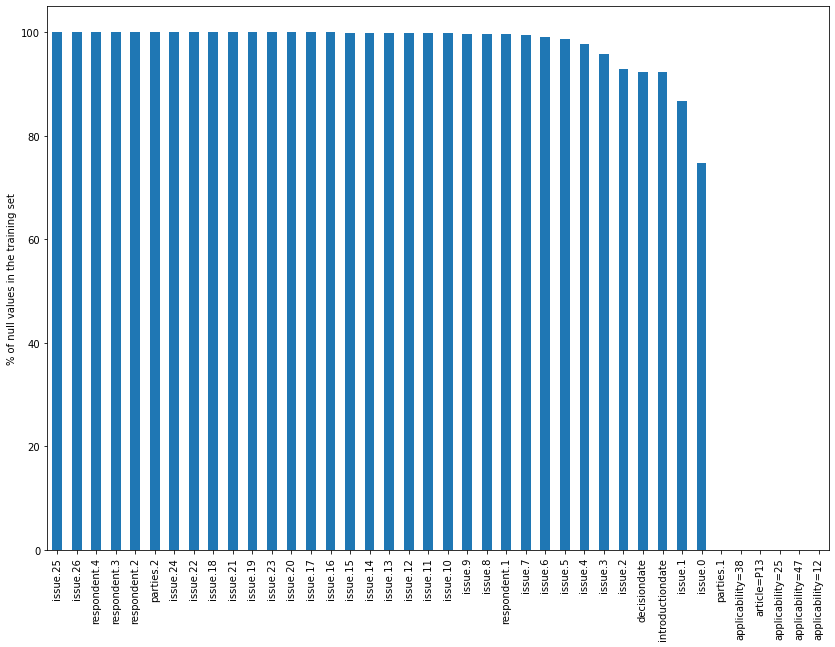

In [7]:
train_null_cols = train_df.isnull().sum().sort_values(ascending=False)/len(train_df)*100
train_null_cols[:40].plot(kind='bar', figsize=(14,10))
plt.ylabel("% of null values in the training set")

Text(0, 0.5, '% of null values in the training set')

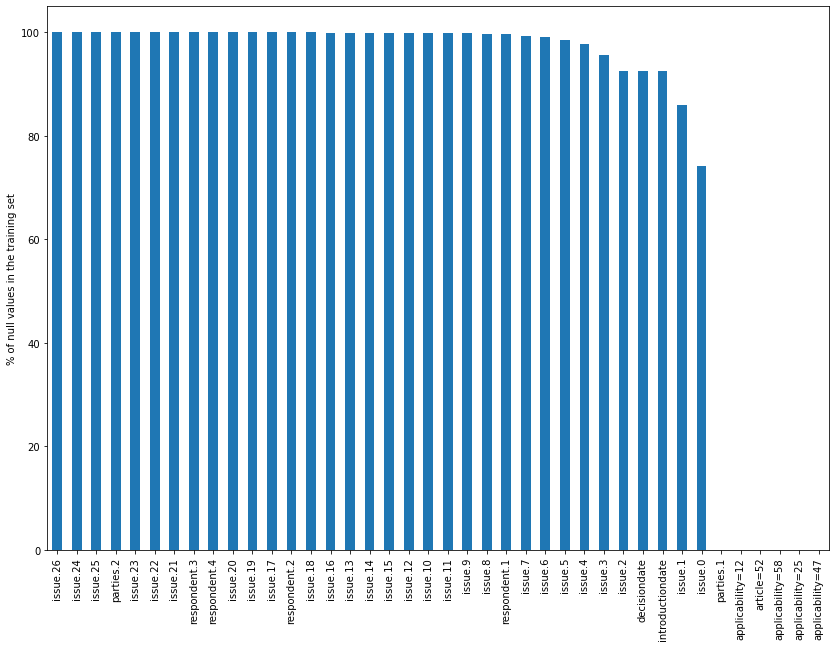

In [8]:
test_null_cols = test_df.isnull().sum().sort_values(ascending=False)/len(test_df)*100
test_null_cols[:40].plot(kind='bar', figsize=(14,10))
plt.ylabel("% of null values in the training set")

In [9]:
# store the columns with >60% values as NULL
train_null_arr = np.array(train_null_cols[:34].index)
test_null_arr = np.array(test_null_cols[:34].index)

In [10]:
# check whether these NULL columns are same in number in both the cases
len(train_null_arr), len(test_null_arr)

(34, 34)

In [11]:
# Are these columns same in both the cases. if yes, then we should get back a null set below
set(train_null_arr).difference(test_null_arr)

set()

In [12]:
# drop these columns
train_df.drop(train_null_arr,axis=1,inplace=True)
test_df.drop(test_null_arr,axis=1,inplace=True)

In [13]:
print("The shape of the training dataset after dropping null columns : {}".format(train_df.shape))
print("The shape of the test dataset after dropping null columns : {}".format(test_df.shape))

The shape of the training dataset after dropping null columns : (8878, 294)
The shape of the test dataset after dropping null columns : (4760, 293)


In [14]:
# how many columns have only one unique value?
cols_with_one_val_train = np.array(train_df.nunique()[train_df.nunique()==1].index)
cols_with_one_val_test = np.array(test_df.nunique()[test_df.nunique()==1].index)

In [15]:
len(cols_with_one_val_test), len(cols_with_one_val_train)

(46, 23)

In [16]:
cols_with_one_val_train

array(['application', 'languageisocode', 'originatingbody_type',
       'documentcollectionid=CASELAW', 'documentcollectionid=JUDGMENTS',
       'documentcollectionid=ENG', 'applicability=51', 'applicability=7',
       'applicability=28', 'applicability=29', 'applicability=31',
       'applicability=19', 'applicability=40', 'applicability=34',
       'applicability=27', 'applicability=64', 'applicability=4',
       'applicability=77', 'paragraphs=7-2', 'paragraphs=28-3',
       'paragraphs=27-1-b', 'paragraphs=32-2', 'paragraphs=46-4'],
      dtype=object)

In [18]:
cols_with_one_val_test

array(['application', 'languageisocode', 'originatingbody_type',
       'article=33', 'article=52', 'article=P13',
       'documentcollectionid=CASELAW', 'documentcollectionid=JUDGMENTS',
       'documentcollectionid=ENG', 'applicability=22', 'applicability=15',
       'applicability=50', 'applicability=6', 'applicability=81',
       'applicability=66', 'applicability=49', 'applicability=63',
       'applicability=68', 'applicability=46', 'applicability=35',
       'applicability=54', 'applicability=16', 'applicability=57',
       'applicability=2', 'applicability=67', 'applicability=71',
       'applicability=59', 'paragraphs=27-2', 'paragraphs=35-2',
       'paragraphs=P1-4', 'paragraphs=56-1', 'paragraphs=P7-1-2',
       'paragraphs=15-3', 'paragraphs=33', 'paragraphs=28-1-a',
       'paragraphs=4-3', 'paragraphs=52', 'paragraphs=P13-1',
       'paragraphs=P7-4-1', 'paragraphs=P4-3', 'paragraphs=29-1',
       'paragraphs=28-1', 'paragraphs=P6-2', 'ccl_article=17',
       'ccl_articl

In [19]:
# Are these columns common in both the sets?
set(cols_with_one_val_test).intersection(cols_with_one_val_train)

{'application',
 'documentcollectionid=CASELAW',
 'documentcollectionid=ENG',
 'documentcollectionid=JUDGMENTS',
 'languageisocode',
 'originatingbody_type'}

In [20]:
# drop the columns with only one unique values in both the datasets
cols_with_one_val = list(set(cols_with_one_val_test).intersection(cols_with_one_val_train))
train_df.drop(cols_with_one_val, axis=1, inplace=True)
test_df.drop(cols_with_one_val, axis=1, inplace=True)

In [21]:
# columns that have one unique val in training set but not in test set -> needs special attention
one_val_train = ['applicability=51', 'applicability=7','applicability=28', 'applicability=29', 'applicability=31',
                 'applicability=19', 'applicability=40', 'applicability=34','applicability=27', 'applicability=64', 
                 'applicability=4','applicability=77', 'paragraphs=7-2', 'paragraphs=28-3','paragraphs=27-1-b', 
                 'paragraphs=32-2', 'paragraphs=46-4']

for col in one_val_train:
    print("train set : ", train_df[col].unique())
    print("test set : ", test_df[col].unique())
    print("-------------------------------")

train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
---------------------------

In [21]:
# since these columns are constant during training, it is better to remove them from both the datasets. But before
# that let's apply value_counts on these columns in the test set

print("Test set")
for col in one_val_train:
    print("*********************")
    print("col : {}".format(col))
    print(test_df[col].value_counts())
    print("---------------------")

Test set
*********************
col : applicability=51
0    4759
1       1
Name: applicability=51, dtype: int64
---------------------
*********************
col : applicability=7
0    4758
1       2
Name: applicability=7, dtype: int64
---------------------
*********************
col : applicability=28
0    4759
1       1
Name: applicability=28, dtype: int64
---------------------
*********************
col : applicability=29
0    4759
1       1
Name: applicability=29, dtype: int64
---------------------
*********************
col : applicability=31
0    4759
1       1
Name: applicability=31, dtype: int64
---------------------
*********************
col : applicability=19
0    4759
1       1
Name: applicability=19, dtype: int64
---------------------
*********************
col : applicability=40
0    4759
1       1
Name: applicability=40, dtype: int64
---------------------
*********************
col : applicability=34
0    4759
1       1
Name: applicability=34, dtype: int64
---------------------
*

In [22]:
# Therefore, it looks like these columns are constant 99% of the time even in the test set and we can safely 
# remove them.
train_df.drop(one_val_train,axis=1,inplace=True)
test_df.drop(one_val_train,axis=1,inplace=True)

In [23]:
# columns that have one unique val in test set but not in training set -> we can keep these columns
one_val_test = ['article=33', 'article=52', 'article=P13', 'applicability=22', 'applicability=15',
                'applicability=50', 'applicability=6', 'applicability=81', 'applicability=66', 'applicability=49',
                'applicability=63', 'applicability=68', 'applicability=46', 'applicability=35','applicability=54', 
                'applicability=16', 'applicability=57', 'applicability=2', 'applicability=67', 'applicability=71',
                'applicability=59', 'paragraphs=27-2', 'paragraphs=35-2', 'paragraphs=P1-4', 'paragraphs=56-1', 
                'paragraphs=P7-1-2', 'paragraphs=15-3', 'paragraphs=33', 'paragraphs=28-1-a', 'paragraphs=4-3',
                'paragraphs=52', 'paragraphs=P13-1', 'paragraphs=P7-4-1', 'paragraphs=P4-3', 'paragraphs=29-1',
                'paragraphs=28-1', 'paragraphs=P6-2', 'ccl_article=17', 'ccl_article=46', 'ccl_article=p12']

for col in one_val_test:
    print("column name : ", col)
    print("train set : ", train_df[col].unique())
    print("test set : ", test_df[col].unique())
    print("-------------------------------")

column name :  article=33
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  article=52
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  article=P13
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=22
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=15
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=50
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=6
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=81
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=66
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=49
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability

In [24]:
# column 'ccl_article=17' has two binary values as -1 and 0. Let's investigate it.
train_df['ccl_article=17'].value_counts(normalize=True)

 0    0.999887
-1    0.000113
Name: ccl_article=17, dtype: float64

In [25]:
test_df['ccl_article=17'].value_counts(normalize=True)

0    1.0
Name: ccl_article=17, dtype: float64

In [26]:
# must be a mistake in entering value in the column 'ccl_article=17'. Let's drop this column as well
train_df.drop('ccl_article=17',axis=1,inplace=True)
test_df.drop('ccl_article=17',axis=1,inplace=True)

In [27]:
# Now let's look at distribution of categories in these columns in the training set
print("Train set")
one_val_test.remove('ccl_article=17')
for col in one_val_test:
    print("*********************")
    print("col : {}".format(col))
    print(train_df[col].value_counts())
    print("---------------------")

Train set
*********************
col : article=33
0    8877
1       1
Name: article=33, dtype: int64
---------------------
*********************
col : article=52
0    8876
1       2
Name: article=52, dtype: int64
---------------------
*********************
col : article=P13
0    8877
1       1
Name: article=P13, dtype: int64
---------------------
*********************
col : applicability=22
0    8877
1       1
Name: applicability=22, dtype: int64
---------------------
*********************
col : applicability=15
0    8877
1       1
Name: applicability=15, dtype: int64
---------------------
*********************
col : applicability=50
0    8876
1       2
Name: applicability=50, dtype: int64
---------------------
*********************
col : applicability=6
0    8876
1       2
Name: applicability=6, dtype: int64
---------------------
*********************
col : applicability=81
0    8877
1       1
Name: applicability=81, dtype: int64
---------------------
*********************
col : applic

In [28]:
# So, as we can see almost all the columns except 'paragraphs=35-2' has not more than 3 entries associated with 
# category=1. Even if the col 'paragraphs=35-2' has a very tiny fraction of category=1. So, we will drop these 
# columns from both the training and test sets as of now.

train_df.drop(one_val_test,axis=1,inplace=True)
test_df.drop(one_val_test,axis=1,inplace=True)

In [29]:
print("The shape of the training set after dropping columns with constant values : {}".format(train_df.shape))
print("The shape of the test set after dropping columns with constant values : {}".format(test_df.shape))

The shape of the training set after dropping columns with constant values : (8878, 231)
The shape of the test set after dropping columns with constant values : (4760, 230)


In [30]:
# check whether there is any duplicate row in both the datasets
print(train_df.duplicated().value_counts())
print("--------------------------")
print(test_df.duplicated().value_counts())

False    8878
dtype: int64
--------------------------
False    4760
dtype: int64


In [31]:
# let's now look at the cols with 'object' type
obj_cols_train = train_df.select_dtypes(include='object')
obj_cols_test = test_df.select_dtypes(include='object')

In [32]:
# are columns with object type are same in both the datsets
print("Train set")
print(list(obj_cols_train.columns))
print("-------------------------------------------------------------------------------------------------------------")
print("Test set")
print(list(obj_cols_test.columns))

Train set
['appno', 'country.alpha2', 'country.name', 'docname', 'doctypebranch', 'ecli', 'itemid', 'judgementdate', 'kpdate', 'originatingbody_name', 'parties.0', 'parties.1', 'respondent.0']
-------------------------------------------------------------------------------------------------------------
Test set
['appno', 'country.alpha2', 'country.name', 'docname', 'doctypebranch', 'ecli', 'itemid', 'judgementdate', 'kpdate', 'originatingbody_name', 'parties.0', 'parties.1', 'respondent.0']


In [33]:
# let's check these columns one by one

**Feature 'appno'**

In [34]:
print("col : appno")
print("Total no. of unique values in the training set : {}".format(train_df['appno'].nunique()))
print("Total no. of unique values in the test set : {}".format(test_df['appno'].nunique()))

col : appno
Total no. of unique values in the training set : 8799
Total no. of unique values in the test set : 4760


In [35]:
# this feature is more likely to be same as that of fetaure like id with different value for each instance and is
# not significant to train on. Let's drop it.
train_df.drop('appno',axis=1,inplace=True)
test_df.drop('appno',axis=1,inplace=True)

**Feature 'country.alpha2'**

In [36]:
print("col : country.alpha2")
print("Total no. of unique values in the training set : {}".format(train_df['country.alpha2'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['country.alpha2'].nunique()))
print("Train set : ",train_df['country.alpha2'].unique(),"\n")
print("Test set : ",test_df['country.alpha2'].unique(),"\n")

col : country.alpha2
Total no. of unique values in the training set : 46
Total no. of unique values in the test set : 46 

Train set :  ['ru' 'tr' 'si' 'ch' 'gr' 'pl' 'gb' 'hu' 'es' 'ua' 'me' 'cz' 'lt' 'az'
 'md' 'mk' 'ro' 'rs' 'de' 'bg' 'al' 'at' 'hr' 'sk' 'it' 'fi' 'fr' 'se'
 'no' 'is' 'am' 'mt' 'be' 'cy' 'ge' 'pt' 'dk' 'lv' 'ee' 'ba' 'nl' 'ie'
 'li' 'sm' 'lu' 'ad'] 

Test set :  ['mk' 'ua' 'ie' 'ru' 'bg' 'pl' 'gr' 'hu' 'de' 'at' 'hr' 'lt' 'md' 'si'
 'fi' 'tr' 'ro' 'cz' 'dk' 'gb' 'al' 'se' 'nl' 'rs' 'sk' 'is' 'lv' 'cy'
 'ge' 'it' 'ch' 'mt' 'es' 'pt' 'ba' 'ee' 'az' 'am' 'sm' 'no' 'be' 'me'
 'fr' 'lu' 'ad' 'li'] 



In [37]:
# do categories present in both of these files same?
print(set(train_df['country.alpha2'].unique()).difference(test_df['country.alpha2'].unique()))
print(set(test_df['country.alpha2'].unique()).difference(train_df['country.alpha2'].unique()))

set()
set()


In [38]:
# what is the distribution of different categories?
print("Train Set:")
print(train_df['country.alpha2'].value_counts(normalize=True))
print("\n")
print("Test Set:")
print(test_df['country.alpha2'].value_counts(normalize=True))

Train Set:
ru    0.185515
ua    0.105091
tr    0.097770
pl    0.069498
hu    0.041000
ro    0.037734
bg    0.034242
gb    0.033904
hr    0.028723
at    0.026245
sk    0.025569
it    0.025118
md    0.024668
si    0.023541
de    0.022077
fr    0.019374
az    0.015093
lt    0.014643
rs    0.014305
fi    0.013066
mk    0.012390
gr    0.010926
nl    0.010813
am    0.009687
ch    0.008223
mt    0.007885
se    0.007547
lv    0.007434
ge    0.006871
cy    0.006195
cz    0.005745
pt    0.005745
ba    0.005632
be    0.005407
es    0.005294
ee    0.004956
al    0.004731
me    0.004393
no    0.004055
dk    0.002591
ie    0.002365
is    0.001577
sm    0.000788
lu    0.000788
li    0.000676
ad    0.000113
Name: country.alpha2, dtype: float64


Test Set:
ru    0.205462
tr    0.095168
ua    0.090966
pl    0.074370
hu    0.041597
ro    0.039286
gb    0.034034
bg    0.033193
hr    0.028151
md    0.027941
sk    0.025210
at    0.023950
si    0.023109
it    0.020588
de    0.019118
rs    0.017227
lt    0.01

**Feature 'country.name'**

In [39]:
print("col : country.name")
print("Total no. of unique values in the training set : {}".format(train_df['country.name'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['country.name'].nunique()))
print("Train set : ",train_df['country.name'].unique(),"\n")
print("Test set : ",test_df['country.name'].unique(),"\n")

col : country.name
Total no. of unique values in the training set : 46
Total no. of unique values in the test set : 46 

Train set :  ['Russian Federation' 'Turkey' 'Slovenia' 'Switzerland' 'Greece' 'Poland'
 'United Kingdom' 'Hungary' 'Spain' 'Ukraine' 'Montenegro' 'Czechia'
 'Lithuania' 'Azerbaijan' 'Moldova, Republic of' 'North Macedonia'
 'Romania' 'Serbia' 'Germany' 'Bulgaria' 'Albania' 'Austria' 'Croatia'
 'Slovakia' 'Italy' 'Finland' 'France' 'Sweden' 'Norway' 'Iceland'
 'Armenia' 'Malta' 'Belgium' 'Cyprus' 'Georgia' 'Portugal' 'Denmark'
 'Latvia' 'Estonia' 'Bosnia and Herzegovina' 'Netherlands' 'Ireland'
 'Liechtenstein' 'San Marino' 'Luxembourg' 'Andorra'] 

Test set :  ['North Macedonia' 'Ukraine' 'Ireland' 'Russian Federation' 'Bulgaria'
 'Poland' 'Greece' 'Hungary' 'Germany' 'Austria' 'Croatia' 'Lithuania'
 'Moldova, Republic of' 'Slovenia' 'Finland' 'Turkey' 'Romania' 'Czechia'
 'Denmark' 'United Kingdom' 'Albania' 'Sweden' 'Netherlands' 'Serbia'
 'Slovakia' 'Iceland' 'Lat

In [40]:
# do categories present in both of these files same?
print(set(train_df['country.name'].unique()).difference(test_df['country.name'].unique()))
print(set(test_df['country.name'].unique()).difference(train_df['country.name'].unique()))

set()
set()


In [41]:
# Actually, country.alpha2 and country.name are the same feature. We can drop one of them as of now. Let's drop 
# country.name.
train_df.drop("country.name",axis=1,inplace=True)
test_df.drop("country.name",axis=1,inplace=True)

**Feature 'docname'**

In [42]:
print("col : docname")
print("Total no. of unique values in the training set : {}".format(train_df['docname'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['docname'].nunique()))
print("Train set : ",train_df['docname'].unique(),"\n")
print("Test set : ",test_df['docname'].unique(),"\n")

col : docname
Total no. of unique values in the training set : 8682
Total no. of unique values in the test set : 4727 

Train set :  ['CASE OF KOKOSHKINA v. RUSSIA' 'CASE OF ÖZCAN v. TURKEY'
 'CASE OF DANIJEL PEČNIK v. SLOVENIA' ... 'CASE OF BABUSHKIN v. RUSSIA'
 'CASE OF BRUALLA GÓMEZ DE LA TORRE v. SPAIN' 'CASE OF TUR v. POLAND'] 

Test set :  ['CASE OF CAMINSKI v. "THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA"'
 'CASE OF KUSHCH v. UKRAINE' 'CASE OF O. v. IRELAND' ...
 'CASE OF PASCAL v. ROMANIA' 'CASE OF DAOUKOPOULOS v. GREECE'
 'CASE OF VOGLREITER v. AUSTRIA'] 



In [43]:
train_df['docname'].unique()[:5]

array(['CASE OF KOKOSHKINA v. RUSSIA', 'CASE OF ÖZCAN v. TURKEY',
       'CASE OF DANIJEL PEČNIK v. SLOVENIA',
       'CASE OF PALANCI v. SWITZERLAND',
       'CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA'], dtype=object)

In [44]:
train_df[['country.alpha2', 'docname']]

,country.alpha2,docname
0,ru,CASE OF KOKOSHKINA v. RUSSIA
1,tr,CASE OF ÖZCAN v. TURKEY
2,si,CASE OF DANIJEL PEČNIK v. SLOVENIA
3,ch,CASE OF PALANCI v. SWITZERLAND
4,ru,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA
...,...,...
8873,ua,CASE OF RASHITOV AND OTHERS v. UKRAINE
8874,ru,CASE OF URMANOV v. RUSSIA
8875,ru,CASE OF BABUSHKIN v. RUSSIA
8876,es,CASE OF BRUALLA GÓMEZ DE LA TORRE v. SPAIN


In [45]:
# this feature contains two pieces of information - person name and the country name against which he/she filed a 
# case. The country information is already present in the feature country.alpha2 and name of a person is more similar
# to ids. So, we can drop this feature as well.

train_df.drop('docname', axis=1,inplace=True)
test_df.drop('docname', axis=1,inplace=True)

**Feature 'doctypebranch'**

In [46]:
print("col : doctypebranch")
print("Total no. of unique values in the training set : {}".format(train_df['doctypebranch'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['doctypebranch'].nunique()))
print("Train set : ",train_df['doctypebranch'].unique(),"\n")
print("Test set : ",test_df['doctypebranch'].unique(),"\n")

col : doctypebranch
Total no. of unique values in the training set : 3
Total no. of unique values in the test set : 3 

Train set :  ['CHAMBER' 'COMMITTEE' 'GRANDCHAMBER'] 

Test set :  ['COMMITTEE' 'CHAMBER' 'GRANDCHAMBER'] 



**Feature 'ecli'**

In [47]:
print("col : ecli")
print("Total no. of unique values in the training set : {}".format(train_df['ecli'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['ecli'].nunique()))
print("Train set : ",train_df['ecli'].unique(),"\n")
print("Test set : ",test_df['ecli'].unique(),"\n")

col : ecli
Total no. of unique values in the training set : 8878
Total no. of unique values in the test set : 4760 

Train set :  ['ECLI:CE:ECHR:2009:0528JUD000205208' 'ECLI:CE:ECHR:2018:0710JUD000472807'
 'ECLI:CE:ECHR:2012:1018JUD004413506' ...
 'ECLI:CE:ECHR:2007:1018JUD006725301' 'ECLI:CE:ECHR:1997:1219JUD002673795'
 'ECLI:CE:ECHR:2007:1023JUD002169505'] 

Test set :  ['ECLI:CE:ECHR:2011:0224JUD000119404' 'ECLI:CE:ECHR:2015:1203JUD005386511'
 'ECLI:CE:ECHR:2012:0119JUD004383807' ...
 'ECLI:CE:ECHR:2012:0417JUD000080509' 'ECLI:CE:ECHR:2018:0712JUD004471116'
 'ECLI:CE:ECHR:2019:0919JUD002115518'] 



In [48]:
# This feature is basically unique id associated with a case and can be dropped.
train_df.drop('ecli',axis=1,inplace=True)
test_df.drop('ecli',axis=1,inplace=True)

**Feature 'itemid'**

In [49]:
print("col : itemid")
print("Total no. of unique values in the training set : {}".format(train_df['itemid'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['itemid'].nunique()))
print("Train set : ",train_df['itemid'].unique(),"\n")
print("Test set : ",test_df['itemid'].unique(),"\n")

col : itemid
Total no. of unique values in the training set : 8878
Total no. of unique values in the test set : 4760 

Train set :  ['001-92699' '001-184490' '001-113810' ... '001-82818' '001-58127'
 '001-82921'] 

Test set :  ['001-103613' '001-158963' '001-108659' ... '001-110382' '001-184485'
 '001-195866'] 



In [50]:
# again a feature similar to ids and hence dropped.
train_df.drop('itemid',axis=1,inplace=True)
test_df.drop('itemid',axis=1,inplace=True)

**Feature 'judgementdate'**

In [51]:
print("col : judgementdate")
print("Total no. of unique values in the training set : {}".format(train_df['judgementdate'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['judgementdate'].nunique()))
print("Train set : ",train_df['judgementdate'].unique(),"\n")
print("Test set : ",test_df['judgementdate'].unique(),"\n")

col : judgementdate
Total no. of unique values in the training set : 1906
Total no. of unique values in the test set : 1584 

Train set :  ['28/05/2009' '10/07/2018' '18/10/2012' ... '29/10/2013' '04/12/2015'
 '19/12/1997'] 

Test set :  ['24/02/2011' '03/12/2015' '19/01/2012' ... '23/10/1990' '10/03/2009'
 '22/07/1999'] 



In [52]:
# date like feature. We will come back to this later.

**Feature 'kpdate'**

In [53]:
print("col : kpdate")
print("Total no. of unique values in the training set : {}".format(train_df['kpdate'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['kpdate'].nunique()))
print("Train set : ",train_df['kpdate'].unique(),"\n")
print("Test set : ",test_df['kpdate'].unique(),"\n")

col : kpdate
Total no. of unique values in the training set : 1906
Total no. of unique values in the test set : 1584 

Train set :  ['28/05/2009' '10/07/2018' '18/10/2012' ... '29/10/2013' '04/12/2015'
 '19/12/1997'] 

Test set :  ['24/02/2011' '03/12/2015' '19/01/2012' ... '23/10/1990' '10/03/2009'
 '22/07/1999'] 



In [54]:
# looks like features 'judgementdate' and 'kpdate' represent the same thing.
train_df[['judgementdate','kpdate']].head(10)

,judgementdate,kpdate
0,28/05/2009,28/05/2009
1,10/07/2018,10/07/2018
2,18/10/2012,18/10/2012
3,25/03/2014,25/03/2014
4,01/10/2009,01/10/2009
5,11/04/2002,11/04/2002
6,20/06/2006,20/06/2006
7,27/11/2007,27/11/2007
8,01/03/2001,01/03/2001
9,02/12/2008,02/12/2008


In [55]:
test_df[['judgementdate','kpdate']].head(10)

,judgementdate,kpdate
0,24/02/2011,24/02/2011
1,03/12/2015,03/12/2015
2,19/01/2012,19/01/2012
3,04/07/2013,04/07/2013
4,26/02/2009,26/02/2009
5,12/03/2009,12/03/2009
6,27/11/2014,27/11/2014
7,12/02/2009,12/02/2009
8,23/10/2012,23/10/2012
9,13/01/2011,13/01/2011


In [56]:
# So these two are duplicate features and we drop one of them.
train_df.drop('kpdate',axis=1,inplace=True)
test_df.drop('kpdate',axis=1,inplace=True)

**Feature 'originatingbody_name'**

In [57]:
print("col : originatingbody_name")
print("Total no. of unique values in the training set : {}".format(train_df['originatingbody_name'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['originatingbody_name'].nunique()))
print("Train set : ",train_df['originatingbody_name'].unique(),"\n")
print("Test set : ",test_df['originatingbody_name'].unique(),"\n")

col : originatingbody_name
Total no. of unique values in the training set : 13
Total no. of unique values in the test set : 13 

Train set :  ['First Section' 'Second Section Committee' 'Fith Section'
 'Second Section' 'Fourth Section' 'Chamber' 'Fourth Section Committee'
 'Fith Section Committee' 'Third Section Committee' 'Third Section'
 'First Section Committee' 'Grand Chamber' 'Plenary'] 

Test set :  ['Fith Section Committee' 'Fith Section' 'First Section' 'Fourth Section'
 'First Section Committee' 'Fourth Section Committee'
 'Third Section Committee' 'Second Section Committee' 'Third Section'
 'Second Section' 'Grand Chamber' 'Chamber' 'Plenary'] 



In [58]:
# are all categories same in both the datasets?
print(set(train_df['originatingbody_name'].unique()).difference(test_df['originatingbody_name']))
print(set(test_df['originatingbody_name'].unique()).difference(train_df['originatingbody_name']))

set()
set()


**Feature 'parties.0'**

In [59]:
print("col : parties.0")
print("Total no. of unique values in the training set : {}".format(train_df['parties.0'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['parties.0'].nunique()))
print("Train set : ",train_df['parties.0'].unique(),"\n")
print("Test set : ",test_df['parties.0'].unique(),"\n")

col : parties.0
Total no. of unique values in the training set : 8361
Total no. of unique values in the test set : 4624 

Train set :  ['KOKOSHKINA' 'ÖZCAN' 'DANIJEL PEČNIK' ... 'BABUSHKIN'
 'BRUALLA GÓMEZ DE LA TORRE' 'TUR'] 

Test set :  ['CAMINSKI' 'KUSHCH' 'O.' ... 'PASCAL' 'DAOUKOPOULOS' 'VOGLREITER'] 



In [60]:
# if we go back to the dropped feature 'docname', we can associate the feature 'parties.0'  most likely to represent the name
# of person filing the case. Since, we have dropped this info earlier, we will drop it this time also.

train_df.drop('parties.0',axis=1,inplace=True)
test_df.drop('parties.0',axis=1,inplace=True)

**Feature 'parties.1'**

In [61]:
print("col : parties.1")
print("Total no. of unique values in the training set : {}".format(train_df['parties.1'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['parties.1'].nunique()))
print("Train set : ",train_df['parties.1'].unique(),"\n")
print("Test set : ",test_df['parties.1'].unique(),"\n")

col : parties.1
Total no. of unique values in the training set : 93
Total no. of unique values in the test set : 76 

Train set :  ['RUSSIA' 'TURKEY' 'SLOVENIA' 'SWITZERLAND' 'GREECE' 'POLAND'
 'THE UNITED KINGDOM' 'HUNGARY' 'SPAIN' 'UKRAINE' 'MONTENEGRO'
 'THE CZECH REPUBLIC [Extracts]' 'LITHUANIA' 'AZERBAIJAN' 'MOLDOVA'
 '"THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA"' 'ROMANIA' 'SERBIA'
 'GERMANY' 'BULGARIA' 'ALBANIA' 'AUSTRIA' 'CROATIA' 'SLOVAKIA' 'ITALY'
 'FINLAND' 'FRANCE [Extracts]' 'SWEDEN' 'NORWAY' 'FRANCE' 'ICELAND'
 'ARMENIA' 'MALTA' 'BELGIUM [Extracts]' 'BELGIUM' 'CYPRUS' 'GEORGIA'
 'THE REPUBLIC OF MOLDOVA' 'PORTUGAL' 'THE CZECH REPUBLIC' 'DENMARK'
 'LATVIA' 'ESTONIA' 'BOSNIA AND HERZEGOVINA' 'THE NETHERLANDS'
 'THE REPUBLIC OF MOLDOVA AND RUSSIA' 'SAN MARINO AND ITALY'
 'ITALY [Extracts]' 'IRELAND' 'ROMANIA [Extracts]' 'NORTH MACEDONIA'
 'BULGARIA [Extracts]' 'LIECHTENSTEIN' 'AZERBAIJAN AND TURKEY'
 'UKRAINE [Extracts]' 'ITALIE' 'MONTENEGRO AND SERBIA'
 'ROMANIA AND BULGARIA

In [62]:
# This feature seems to represent country names and might be duplicate with country.alpha2

train_df[['country.alpha2','parties.1']].head(10)

,country.alpha2,parties.1
0,ru,RUSSIA
1,tr,TURKEY
2,si,SLOVENIA
3,ch,SWITZERLAND
4,ru,RUSSIA
5,gr,GREECE
6,pl,POLAND
7,gb,THE UNITED KINGDOM
8,hu,HUNGARY
9,tr,TURKEY


In [63]:
test_df[['country.alpha2','parties.1']].head()

,country.alpha2,parties.1
0,mk,"""THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA"""
1,ua,UKRAINE
2,ie,IRELAND
3,ru,RUSSIA
4,ru,RUSSIA


In [64]:
# our guess is right! We drop this feature.

train_df.drop('parties.1',axis=1,inplace=True)
test_df.drop('parties.1',axis=1,inplace=True)

**Feature 'respondent.0'**

In [65]:
print("col : respondent.0")
print("Total no. of unique values in the training set : {}".format(train_df['respondent.0'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['respondent.0'].nunique()))
print("Train set : ",train_df['respondent.0'].unique(),"\n")
print("Test set : ",test_df['respondent.0'].unique(),"\n")

col : respondent.0
Total no. of unique values in the training set : 46
Total no. of unique values in the test set : 46 

Train set :  ['RUS' 'TUR' 'SVN' 'CHE' 'GRC' 'POL' 'GBR' 'HUN' 'ESP' 'UKR' 'MNE' 'CZE'
 'LTU' 'AZE' 'MDA' 'MKD' 'ROU' 'SRB' 'DEU' 'BGR' 'ALB' 'AUT' 'HRV' 'SVK'
 'ITA' 'FIN' 'FRA' 'SWE' 'NOR' 'ISL' 'ARM' 'MLT' 'BEL' 'CYP' 'GEO' 'PRT'
 'DNK' 'LVA' 'EST' 'BIH' 'NLD' 'IRL' 'LIE' 'SMR' 'LUX' 'AND'] 

Test set :  ['MKD' 'UKR' 'IRL' 'RUS' 'BGR' 'POL' 'GRC' 'HUN' 'DEU' 'AUT' 'HRV' 'LTU'
 'MDA' 'SVN' 'FIN' 'TUR' 'ROU' 'CZE' 'DNK' 'GBR' 'ALB' 'SWE' 'NLD' 'SRB'
 'SVK' 'ISL' 'LVA' 'CYP' 'GEO' 'ITA' 'CHE' 'MLT' 'ESP' 'PRT' 'BIH' 'EST'
 'AZE' 'ARM' 'SMR' 'NOR' 'BEL' 'MNE' 'FRA' 'LUX' 'AND' 'LIE'] 



In [66]:
# again this info is likely to be same as the feature 'country.alpha2'
train_df[['country.alpha2','respondent.0']].head(10)

,country.alpha2,respondent.0
0,ru,RUS
1,tr,TUR
2,si,SVN
3,ch,CHE
4,ru,RUS
5,gr,GRC
6,pl,POL
7,gb,GBR
8,hu,HUN
9,tr,TUR


In [67]:
test_df[['country.alpha2','respondent.0']].head(10)

,country.alpha2,respondent.0
0,mk,MKD
1,ua,UKR
2,ie,IRL
3,ru,RUS
4,ru,RUS
5,ru,RUS
6,ua,UKR
7,bg,BGR
8,pl,POL
9,gr,GRC


In [68]:
# hence we drop it.
train_df.drop('respondent.0',axis=1,inplace=True)
test_df.drop('respondent.0',axis=1,inplace=True)

In [69]:
# remaining cols with 'object' type
final_obj_cols = train_df.select_dtypes(include='object').columns
final_obj_cols

Index(['country.alpha2', 'doctypebranch', 'judgementdate',
       'originatingbody_name'],
      dtype='object')

In [70]:
print("The shape of the training set after dropping categorical features : {}".format(train_df.shape))
print("The shape of the test set after dropping categorical features : {}".format(test_df.shape))

The shape of the training set after dropping categorical features : (8878, 222)
The shape of the test set after dropping categorical features : (4760, 221)


In [71]:
# let's look at the mixed data type features now. Since, we have dropped quite a few cols already, let's first 
# check whether these features are still present in the respective datasets.

print([col for col in mixed_cols_train if col in train_df.columns])
print([col for col in mixed_cols_test if col in test_df.columns])

[]
[]


In [72]:
# so, we have already removed these features from our dataset. Let's look at some non-categorical features.
train_df.select_dtypes(include='bool')

,separateopinion
0,False
1,False
2,True
3,True
4,False
...,...
8873,False
8874,False
8875,False
8876,False


In [73]:
test_df.select_dtypes(include='bool')

,separateopinion
0,False
1,False
2,False
3,False
4,False
...,...
4755,False
4756,False
4757,False
4758,False


In [74]:
# let's convert this as follows : True->1, False->0.
train_df['separateopinion'] = train_df['separateopinion'].apply(lambda x:1 if x is True else 0)
test_df['separateopinion'] = test_df['separateopinion'].apply(lambda x:1 if x is True else 0)

In [75]:
train_df.select_dtypes(include='float64')

,rank
0,685.417419
1,2641.901855
2,942.213440
3,1121.770142
4,704.821594
...,...
8873,2424.463379
8874,1698.433228
8875,607.506531
8876,362.514832


In [76]:
test_df.select_dtypes(include='float64')

,rank
0,794.766724
1,1448.891235
2,868.238831
3,1024.145508
4,672.862183
...,...
4755,1678.799805
4756,1161.929688
4757,892.368225
4758,2646.512939


In [77]:
# keep in mind, this feature m ght require scaling in future.

In [78]:
train_df.select_dtypes(include='int64')

,originatingbody,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,...,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,4,38,0,349418,15,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,4
1,26,47,0,476616,15,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,4
2,23,43,1,373194,15,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,4
3,5,46,1,392525,15,0,0,0,0,1,...,0,0,0,-1,0,0,0,0,0,4
4,4,38,0,423100,15,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,29,48,0,473530,15,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,4
8874,27,38,0,456937,15,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,4
8875,6,38,0,340823,15,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8876,9,44,0,443927,15,0,1,0,0,0,...,0,-1,0,0,0,0,0,0,0,3


In [79]:
# let's first examine non-binary features

**Feature 'sharepointid'**

In [80]:
print("Total number of unique values in the training set : {}".format(train_df['sharepointid'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['sharepointid'].nunique()))

Total number of unique values in the training set : 8878
Total number of unique values in the test set : 4760


In [81]:
# again, this feature is like ids and can be dropped with no harm.
train_df.drop('sharepointid',axis=1,inplace=True)
test_df.drop('sharepointid',axis=1,inplace=True)

**Feature 'originatingbody'**

In [82]:
print("Total number of unique values in the training set : {}".format(train_df['originatingbody'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['originatingbody'].nunique()))

Total number of unique values in the training set : 13
Total number of unique values in the test set : 13


**Feature 'respondentOrderEng'**

In [83]:
print("Total number of unique values in the training set : {}".format(train_df['respondentOrderEng'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['respondentOrderEng'].nunique()))

Total number of unique values in the training set : 46
Total number of unique values in the test set : 46


**Feature 'typedescription'**

In [84]:
print("Total number of unique values in the training set : {}".format(train_df['typedescription'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['typedescription'].nunique()))

Total number of unique values in the training set : 5
Total number of unique values in the test set : 3


In [85]:
train_df['typedescription'].unique()

array([15, 14, 18, 12, 19])

In [86]:
test_df['typedescription'].unique()

array([15, 14, 12])

In [87]:
# the feature 'typedescription' looks like a categorical feature in disguise. We can use as it is or apply 
# onehotencoding.

# let's now select only the binary features.
binary_feat_train = list(train_df.select_dtypes(include='int64').nunique()[train_df.select_dtypes(include='int64').nunique()==2].index)
binary_feat_test = list(test_df.select_dtypes(include='int64').nunique()[test_df.select_dtypes(include='int64').nunique()==2].index)

In [88]:
print("Number of binary features in the training set : {}".format(len(binary_feat_train)))
print("Number of binary features in the test set : {}".format(len(binary_feat_test)))

Number of binary features in the training set : 192
Number of binary features in the test set : 194


In [89]:
# there two more binary features in test set compared to the traing set. 
print(len(set(binary_feat_test).intersection(binary_feat_train)))
print(len(set(binary_feat_train).intersection(binary_feat_test)))

192
192


In [90]:
set(binary_feat_test).difference(binary_feat_train)

{'ccl_article=12', 'ccl_article=25'}

In [91]:
test_df['ccl_article=12'].value_counts(normalize=True)

0    0.99958
1    0.00042
Name: ccl_article=12, dtype: float64

In [92]:
test_df['ccl_article=25'].value_counts(normalize=True)

0    0.99958
1    0.00042
Name: ccl_article=25, dtype: float64

In [93]:
train_df['ccl_article=12'].value_counts(normalize=True)

 0    0.998085
-1    0.001126
 1    0.000788
Name: ccl_article=12, dtype: float64

In [94]:
train_df['ccl_article=25'].value_counts(normalize=True)

 0    0.999099
 1    0.000563
-1    0.000338
Name: ccl_article=25, dtype: float64

In [95]:
# since 99% instances in both these features belong to a single category, we can assume that they are basically
# constant features and should be dropped.
binary_feat_to_drop = list(set(binary_feat_test).difference(binary_feat_train))
train_df.drop(binary_feat_to_drop,axis=1,inplace=True)
test_df.drop(binary_feat_to_drop,axis=1,inplace=True)

In [96]:
binary_feat_test.remove(binary_feat_to_drop[0])
binary_feat_test.remove(binary_feat_to_drop[1])

In [97]:
# check whether any binary feature contains suspicious values, e.g., -1,999 etc.

cols_train = [col for col in binary_feat_train for val in train_df[col].unique() if val!=0 and val!=1]
cols_test = [col for col in binary_feat_test for val in test_df[col].unique() if val!=0 and val!=1]

In [98]:
cols_train

['ccl_article=18']

In [99]:
cols_test

['ccl_article=18']

In [100]:
print("Train set")
print(train_df['ccl_article=18'].value_counts(normalize=True))
print("----------------------------------------")
print("Test set")
print(test_df['ccl_article=18'].value_counts(normalize=True))

Train set
 0    0.998085
-1    0.001915
Name: ccl_article=18, dtype: float64
----------------------------------------
Test set
 0    0.997269
-1    0.002731
Name: ccl_article=18, dtype: float64


In [101]:
# So, like before, we can drop this column. 
train_df.drop('ccl_article=18',axis=1,inplace=True)
test_df.drop('ccl_article=18',axis=1,inplace=True)

In [102]:
# let's now look at the features which are binary in real but contains some garbage values.

pseudo_bin_feat_train = list(train_df.select_dtypes(include='int64').nunique()[train_df.select_dtypes(include='int64').nunique()>2].index)
pseudo_bin_feat_test = list(test_df.select_dtypes(include='int64').nunique()[test_df.select_dtypes(include='int64').nunique()>2].index)

In [103]:
set(pseudo_bin_feat_train).difference(pseudo_bin_feat_test)

{'importance'}

In [104]:
# But we have already investigated some of these non-binary features. Let's remove them.
pseudo_bin_feat_train.remove('originatingbody')
pseudo_bin_feat_train.remove('respondentOrderEng')
pseudo_bin_feat_train.remove('typedescription')
pseudo_bin_feat_train.remove('importance')
pseudo_bin_feat_test.remove('originatingbody')
pseudo_bin_feat_test.remove('respondentOrderEng')
pseudo_bin_feat_test.remove('typedescription')

In [105]:
for col in pseudo_bin_feat_train:
    print("Train set \n")
    print(train_df[col].value_counts())
    print("Test set \n")
    print(test_df[col].value_counts())
    print("--------------------------------------------------------------")

Train set 

 0    8117
 1     700
-1      61
Name: ccl_article=1, dtype: int64
Test set 

 0    4315
 1     404
-1      41
Name: ccl_article=1, dtype: int64
--------------------------------------------------------------
Train set 

 0    8449
 1     332
-1      97
Name: ccl_article=10, dtype: int64
Test set 

 0    4514
 1     185
-1      61
Name: ccl_article=10, dtype: int64
--------------------------------------------------------------
Train set 

 0    8718
 1     136
-1      24
Name: ccl_article=11, dtype: int64
Test set 

 0    4657
 1      86
-1      17
Name: ccl_article=11, dtype: int64
--------------------------------------------------------------
Train set 

 0    8121
 1     694
-1      63
Name: ccl_article=13, dtype: int64
Test set 

 0    4341
 1     364
-1      55
Name: ccl_article=13, dtype: int64
--------------------------------------------------------------
Train set 

 0    8829
-1      46
 1       3
Name: ccl_article=14, dtype: int64
Test set 

 0    4731
-1      28
 

In [106]:
# the feature 'ccl_article=14' is quite peculliar. It has more entries for category -1 in both train and test sets 
# as compared tocategory 1. It could be a typo either in favour of -1 or +1. If we assume that 1 is a typo as it is 
# fewer in number, then we can replace 1 by -1 and treat it as null. But then it becomes a constant feature with one
# unique value which is zero and some null entries (when we impute it by 0). In that situation, it is better to 
# drop this feature.
# However, if we do reverse, i.e., replace -1 by 1, then it becomes a proper binary feature. Let's first go with the
# first option. If our model performs poorly, we will try to tweak it.

train_df.drop('ccl_article=14',axis=1,inplace=True)
test_df.drop('ccl_article=14',axis=1,inplace=True)

In [107]:
pseudo_bin_feat_train.remove('ccl_article=14')
# for the rest of the features in pseudo_bin_feat_train, we will treat -1 as null entries and impute them later.

In [108]:
# missing value imputation
# but before that, let's check the category distribution in each binary feature with null values
for col in pseudo_bin_feat_train:
    print("Train set \n")
    print(train_df[col].value_counts(normalize=True))
    print("Test set \n")
    print(test_df[col].value_counts(normalize=True))
    print("--------------------------------------------------------------")

Train set 

 0    0.914282
 1    0.078847
-1    0.006871
Name: ccl_article=1, dtype: float64
Test set 

 0    0.906513
 1    0.084874
-1    0.008613
Name: ccl_article=1, dtype: float64
--------------------------------------------------------------
Train set 

 0    0.951678
 1    0.037396
-1    0.010926
Name: ccl_article=10, dtype: float64
Test set 

 0    0.948319
 1    0.038866
-1    0.012815
Name: ccl_article=10, dtype: float64
--------------------------------------------------------------
Train set 

 0    0.981978
 1    0.015319
-1    0.002703
Name: ccl_article=11, dtype: float64
Test set 

 0    0.978361
 1    0.018067
-1    0.003571
Name: ccl_article=11, dtype: float64
--------------------------------------------------------------
Train set 

 0    0.914733
 1    0.078171
-1    0.007096
Name: ccl_article=13, dtype: float64
Test set 

 0    0.911975
 1    0.076471
-1    0.011555
Name: ccl_article=13, dtype: float64
--------------------------------------------------------------
Tr

In [109]:
# stop!! looks like we can drop even more features, e.g. features with 99% dominance by one category.
cols_to_drop = ['ccl_article=38','ccl_article=4', 'ccl_article=7', 'ccl_article=9','ccl_article=p4','ccl_article=p7']
train_df.drop(cols_to_drop,axis=1,inplace=True)
test_df.drop(cols_to_drop,axis=1,inplace=True)

In [110]:
for col in cols_to_drop:
    pseudo_bin_feat_train.remove(col)

In [111]:
#train_df['judgementdate']

In [111]:
# let's look at the datetime fetaure 'judgementdate' and break it down into several parts.

train_df['judge_year'] = train_df['judgementdate'].apply(lambda x:int(x.split("/")[-1].strip()))
test_df['judge_year'] = test_df['judgementdate'].apply(lambda x:int(x.split("/")[-1].strip()))

In [112]:
# how many different judgement years are there?
print("unique values in the col judgementyear in the training set :", sorted(train_df['judge_year'].unique()))
print("\n")
print("unique values in the col judgementyear in the test set :", sorted(test_df['judge_year'].unique()))

unique values in the col judgementyear in the training set : [1968, 1969, 1971, 1974, 1975, 1976, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


unique values in the col judgementyear in the test set : [1961, 1968, 1970, 1972, 1975, 1976, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [113]:
# let's club the years in decades and look at the distribution of importance vs judge_year

def year_to_decade(year):
    
    """
    
    """
    
    if year>=1960 and year<=1969:
        return "19_60s"
    elif year>=1970 and year<=1979:
        return "19_70s"
    elif year>=1980 and year<=1989:
        return "19_80s"
    elif year>=1990 and year<=1999:
        return "19_90s"
    elif year>=2000 and year<=2009:
        return "20_10s"
    else:
        return "20_20s"
    
    
train_df['judge_decade'] = train_df['judge_year'].apply(year_to_decade)
test_df['judge_decade'] = test_df['judge_year'].apply(year_to_decade)

In [114]:
train_df[['judge_year','judge_decade']][:10]

,judge_year,judge_decade
0,2009,20_10s
1,2018,20_20s
2,2012,20_20s
3,2014,20_20s
4,2009,20_10s
5,2002,20_10s
6,2006,20_10s
7,2007,20_10s
8,2001,20_10s
9,2008,20_10s


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='judge_decade', ylabel='count'>

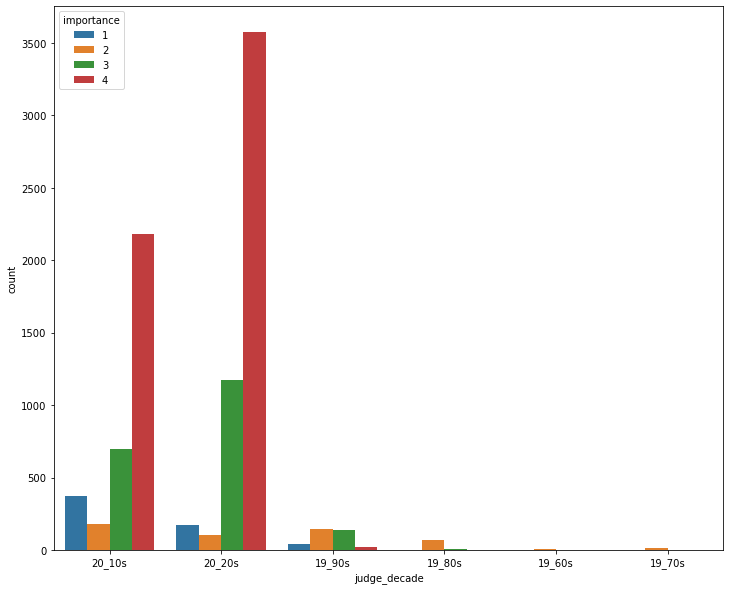

In [115]:
plt.figure(figsize=(12,10))
sns.countplot('judge_decade',hue='importance',data=train_df)

In [116]:
# from the distribution, it is clear that importance of cases filed has increased with decades. We will use it as a
# feature and drop the judge_year column.
train_df.drop('judge_year',axis=1,inplace=True)
test_df.drop('judge_year',axis=1,inplace=True)

# as of now, we will not be engineering the feature judgementdate anymore and won't use it during training. If, in
# future, we need to improve our model by adding some features, we will come back to it.

In [117]:
# Let's now drop cols with high cardinality
print("Training set")
for col in train_df.select_dtypes(include='object').columns:
    print("cardinality of {} is {}".format(col, train_df[col].nunique()))
print("-------------------------------------------------")    
print("Test set")
for col in test_df.select_dtypes(include='object').columns:
    print("cardinality of {} is {}".format(col, test_df[col].nunique()))

Training set
cardinality of country.alpha2 is 46
cardinality of doctypebranch is 3
cardinality of judgementdate is 1906
cardinality of originatingbody_name is 13
cardinality of judge_decade is 6
-------------------------------------------------
Test set
cardinality of country.alpha2 is 46
cardinality of doctypebranch is 3
cardinality of judgementdate is 1584
cardinality of originatingbody_name is 13
cardinality of judge_decade is 6


In [118]:
train_df.drop(['country.alpha2','judgementdate'],axis=1,inplace=True)
test_df.drop(['country.alpha2','judgementdate'],axis=1,inplace=True)

In [120]:
print("The shape of the training set after feature removal: {}".format(train_df.shape))
print("The shape of the test set after feature removal: {}".format(test_df.shape))

The shape of the training set after feature removal: (8878, 210)
The shape of the test set after feature removal: (4760, 209)


In [121]:
# let's now define our feature matrix and target variable
X = train_df.drop('importance',axis=1)
y = train_df[['importance']]

In [122]:
X.head()

,doctypebranch,originatingbody,originatingbody_name,rank,respondentOrderEng,separateopinion,typedescription,article=3,article=6,article=P1,...,ccl_article=13,ccl_article=2,ccl_article=3,ccl_article=34,ccl_article=5,ccl_article=6,ccl_article=8,ccl_article=p1,ccl_article=p6,judge_decade
0,CHAMBER,4,First Section,685.417419,38,0,15,1,0,0,...,0,0,1,0,1,0,0,0,0,20_10s
1,COMMITTEE,26,Second Section Committee,2641.901855,47,0,15,0,0,0,...,0,0,0,0,1,0,0,0,0,20_20s
2,CHAMBER,23,Fith Section,942.213440,43,1,15,0,1,0,...,1,0,0,0,0,1,0,0,0,20_20s
3,CHAMBER,5,Second Section,1121.770142,46,1,15,0,0,0,...,0,0,0,0,0,0,-1,0,0,20_20s
4,CHAMBER,4,First Section,704.821594,38,0,15,1,0,0,...,0,1,1,0,1,0,0,0,0,20_10s


In [123]:
y.head()

,importance
0,4
1,4
2,4
3,4
4,4


In [124]:
# let's look at our target variable
y['importance'].value_counts(normalize=True)

4    0.650372
3    0.226515
1    0.065555
2    0.057558
Name: importance, dtype: float64

In [139]:
# Since the cardinality of the target variable is greater than 2, it is a multiclass classification problem. Our 
# target metric is accuracy_score and we will optimize the metric logloss

In [125]:
# missing value imputation
for col in pseudo_bin_feat_train:
    print(train_df[col].value_counts(normalize=True))

 0    0.914282
 1    0.078847
-1    0.006871
Name: ccl_article=1, dtype: float64
 0    0.951678
 1    0.037396
-1    0.010926
Name: ccl_article=10, dtype: float64
 0    0.981978
 1    0.015319
-1    0.002703
Name: ccl_article=11, dtype: float64
 0    0.914733
 1    0.078171
-1    0.007096
Name: ccl_article=13, dtype: float64
 0    0.937373
 1    0.053052
-1    0.009574
Name: ccl_article=2, dtype: float64
 0    0.826988
 1    0.140797
-1    0.032214
Name: ccl_article=3, dtype: float64
 0    0.983555
 1    0.008560
-1    0.007885
Name: ccl_article=34, dtype: float64
 0    0.837351
 1    0.138545
-1    0.024105
Name: ccl_article=5, dtype: float64
 0    0.487948
 1    0.451115
-1    0.060937
Name: ccl_article=6, dtype: float64
 0    0.895247
 1    0.074003
-1    0.030750
Name: ccl_article=8, dtype: float64
 0    0.916197
 1    0.074228
-1    0.009574
Name: ccl_article=p1, dtype: float64


In [146]:
# we assume -1 to represent null values and try to impute it. To impute missing values, we can use the following 
# strategies - 'mean', 'median', 'most_frequent', 'constant'. If a feature is almost entirely dominated by a 
# specific category, it is logical to use 'most_frequent' strategy. 'mean' could be used for a more balanced
# category distribution. 'mean'/median'/'constant' strategy won't work well in this case since we are dealing 
# with binary features.
# However, looking at the above result, one can also think of -1 as a typo since it's percentage is very low.
# Let's first try imputing all -1 using the 'most_frequent' strategy. Later, if needed (to enhance the model's
# performance), we will try replacing all -1 by 1.

In [126]:
# encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

In [132]:
print("The shape of the feature matrix is : {}".format(X.shape))

The shape of the feature matrix is : (8878, 225)


In [133]:
# build the model pipeline

def build_pipeline(model):
    
    pipeline = Pipeline([
                    ('imputer', SimpleImputer(missing_values=-1,strategy='most_frequent')),
                    ('scaler', StandardScaler()),
                    ('classifier', model)
                   ])
        
    return pipeline    

In [134]:
# grid search 

def grid_search(model,param_dict):
    
    grid_cv = GridSearchCV(model,param_grid=param_dict, scoring='neg_log_loss', verbose=2)
    return grid_cv

In [157]:
# first we will perform coarse scanning. Then, if needed, finer scanning would be tried.

In [135]:
# split the dataset into train and validation subsets
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=21)

print("The shape of X_train : {}".format(X_train.shape))
print("The shape of X_val : {}".format(X_val.shape))

The shape of X_train : (7102, 225)
The shape of X_val : (1776, 225)


In [136]:
# distribution of different classes in training and validation sets
print("Train Set")
print(y_train['importance'].value_counts(normalize=True))
print("\n")
print("Validation Set")
print(y_val['importance'].value_counts(normalize=True))

Train Set
4    0.649113
3    0.226978
1    0.066179
2    0.057730
Name: importance, dtype: float64


Validation Set
4    0.655405
3    0.224662
1    0.063063
2    0.056869
Name: importance, dtype: float64


In [146]:
def fit_and_eval_model(model, param_dict):
    
    model_name = str(model).split("(")[0]
    
    pipeline = build_pipeline(model)
    grid_cv = grid_search(pipeline,param_dict)

    # fit the model to the train set
    grid_cv.fit(X_train,y_train)

    # predict on the train set
    train_pred = grid_cv.predict(X_train)

    # predict on the validation set
    val_pred = grid_cv.predict(X_val)

    # evaluate the model on the train set
    train_score = accuracy_score(y_true=y_train, y_pred=train_pred)

    # evaluate the model on the validation set
    val_score = accuracy_score(y_true=y_val, y_pred=val_pred)


    print("The best parameter for the model {} is {}.\n".format(model_name, grid_cv.best_params_))
    print("The best score obtained for the model {} during grid search is {}.\n".format(model_name,grid_cv.best_score_))
    print("The train score of the model {} is {}.\n".format(model_name,train_score))
    print("The validation score of the model {} is {}.".format(model_name,val_score))    
    
    return grid_cv, train_score, val_score

**K nearest neighbors**

In [153]:
model = KNeighborsClassifier()
#param_dict = [
#              {'classifier__n_neighbors': list(np.arange(5,35,5))},
#              {'classifier__weights': ['uniform','distance']}
#             ]

param_dict = {'classifier__n_neighbors': list(np.arange(5,35,5)),
              'classifier__weights': ['uniform','distance']}

grid_cv_knn, knn_train_score, knn_val_score = fit_and_eval_model(model,param_dict)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   2.8s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   2.9s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   3.1s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   3.3s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   3.1s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   3.2s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   3.1s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   3.4s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   3.2s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   3.3s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   3.2s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   3.1s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   3.1s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   3.1s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   3.7s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   4.2s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   4.8s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   4.1s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   4.1s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   3.6s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   3.7s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   4.1s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   4.2s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   3.7s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   3.9s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   4.3s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   3.9s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   3.6s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   3.4s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   3.3s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   3.3s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   3.4s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   3.5s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   3.4s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   3.3s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   3.6s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   3.6s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   3.8s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   3.9s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   4.0s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   3.7s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.4min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


The best parameter for the model KNeighborsClassifier is {'classifier__n_neighbors': 30, 'classifier__weights': 'distance'}.

The best score obtained for the model KNeighborsClassifier during grid search is -0.8810155578498808.

The train score of the model KNeighborsClassifier is 1.0.

The validation score of the model KNeighborsClassifier is 0.8006756756756757.


**Logistic Regression**

In [152]:
model = LogisticRegression(multi_class='multinomial')

param_dict = {'classifier__C': list(np.arange(0.5,5.5,0.5)),
              'classifier__class_weight': ['None','balanced']}

grid_cv_lr, lr_train_score, lr_val_score = fit_and_eval_model(model,param_dict)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] classifier__C=0.5, classifier__class_weight=None ................
[CV] . classifier__C=0.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=0.5, classifier__class_weight=None ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_

[CV] . classifier__C=0.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=0.5, classifier__class_weight=None ................
[CV] . classifier__C=0.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=0.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=0.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=0.5, classifier__class_weight=None ................
[CV] . classifier__C=0.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=0.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=0.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=0.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=0.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=0.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=0.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=0.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=0.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=0.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=0.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.0, classifier__class_weight=None ................
[CV] . classifier__C=1.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.0, classifier__class_weight=None ................
[CV] . classifier__C=1.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=1.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.0, classifier__class_weight=None ................
[CV] . classifier__C=1.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=1.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=1.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=1.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.5, classifier__class_weight=None ................
[CV] . classifier__C=1.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=1.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.5, classifier__class_weight=None ................
[CV] . classifier__C=1.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=1.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.5, classifier__class_weight=None ................
[CV] . classifier__C=1.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=1.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=1.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=1.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=1.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.0, classifier__class_weight=None ................
[CV] . classifier__C=2.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=2.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.0, classifier__class_weight=None ................
[CV] . classifier__C=2.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=2.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.0, classifier__class_weight=None ................
[CV] . classifier__C=2.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=2.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=2.0, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=2.5, classifier__class_weight=None ................
[CV] . classifier__C=2.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=2.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.5, classifier__class_weight=None ................
[CV] . classifier__C=2.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=2.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.5, classifier__class_weight=None ................
[CV] . classifier__C=2.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=2.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=2.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=2.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=2.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=2.5, classifier__class_weight=balanced, total=   0.7s
[CV] classifier__C=3.0, classifier__class_weight=None ................
[CV] . classifier__C=3.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=3.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.0, classifier__class_weight=None ................
[CV] . classifier__C=3.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=3.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.0, classifier__class_weight=None ................
[CV] . classifier__C=3.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=3.0, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=3.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=3.0, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=3.5, classifier__class_weight=None ................
[CV] . classifier__C=3.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=3.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.5, classifier__class_weight=None ................
[CV] . classifier__C=3.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=3.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.5, classifier__class_weight=None ................
[CV] . classifier__C=3.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=3.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=3.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.0, classifier__class_weight=None ................
[CV] . classifier__C=4.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=4.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.0, classifier__class_weight=None ................
[CV] . classifier__C=4.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=4.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.0, classifier__class_weight=None ................
[CV] . classifier__C=4.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=4.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=4.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.5, classifier__class_weight=None ................
[CV] . classifier__C=4.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=4.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.5, classifier__class_weight=None ................
[CV] . classifier__C=4.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=4.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.5, classifier__class_weight=None ................
[CV] . classifier__C=4.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=4.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=4.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=4.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=5.0, classifier__class_weight=None ................
[CV] . classifier__C=5.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=5.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=5.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=5.0, classifier__class_weight=None ................
[CV] . classifier__C=5.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=5.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=5.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=5.0, classifier__class_weight=None ................
[CV] . classifier__C=5.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=5.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=5.0, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=5.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=5.0, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=5.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=5.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=5.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=5.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=5.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   33.0s finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=5.0, classifier__class_weight=balanced, total=   0.5s
The best parameter for the model LogisticRegression is {'classifier__C': 0.5, 'classifier__class_weight': 'balanced'}.

The best score obtained for the model LogisticRegression during grid search is -0.6281117917000996.

The train score of the model LogisticRegression is 0.812869614193185.

The validation score of the model LogisticRegression is 0.7888513513513513.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [151]:
grid_cv_lr.best_estimator_

Pipeline(steps=[('imputer',
                 SimpleImputer(missing_values=-1, strategy='most_frequent')),
                ('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.5, multi_class='multinomial'))])

**Random Forest Classifier**

In [154]:
model = RandomForestClassifier()
param_dict = {'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__criterion': ['gini','entropy'],
              'classifier__max_features':['sqrt','log2'],
              'classifier__class_weight':['balanced',None]
             }

grid_cv_rf, rf_train_score, rf_val_score = fit_and_eval_model(model,param_dict)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.5min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


The best parameter for the model RandomForestClassifier is {'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 130}.

The best score obtained for the model RandomForestClassifier during grid search is -0.44147217352160356.

The train score of the model RandomForestClassifier is 1.0.

The validation score of the model RandomForestClassifier is 0.8693693693693694.


In [156]:
np.arange(0.1,1,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

**XGB classifier**

In [158]:
model = XGBClassifier()
param_dict = {'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__learning_rate': np.arange(0.1,1,0.1)
              #'classifier__booster': ['gbtree','gblinear','dart']
             }

grid_cv_xgb, xgb_train_score, xgb_val_score = fit_and_eval_model(model,param_dict)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] classifier__learning_rate=0.1, classifier__n_estimators=50 ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:00:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  classifier__learning_rate=0.1, classifier__n_estimators=50, total=   2.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=50 ......
[22:00:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=50, total=   2.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=50 ......
[22:00:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=50, total=   2.1s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=50 ......
[22:00:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=50, total=   2.0s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=50 ......
[22:00:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=50, total=   2.0s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=70 ......
[22:00:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=70, total=   2.9s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=70 ......
[22:00:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=70, total=   2.8s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=70 ......
[22:00:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=70, total=   2.8s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=70 ......
[22:00:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=70, total=   2.8s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=70 ......
[22:00:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=70, total=   2.8s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=90 ......
[22:00:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=90, total=   3.5s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=90 ......
[22:00:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=90, total=   3.7s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=90 ......
[22:00:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=90 ......
[22:00:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=90 ......
[22:00:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=110 .....
[22:00:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=110, total=   5.4s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=110 .....
[22:00:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=110, total=   5.3s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=110 .....
[22:01:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=110, total=   5.3s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=110 .....
[22:01:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=110 .....
[22:01:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=110, total=   5.7s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=130 .....
[22:01:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=130 .....
[22:01:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=130, total=   6.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=130 .....
[22:01:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=130 .....
[22:01:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=130 .....
[22:01:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=50 ......
[22:01:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=50 ......
[22:01:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=50 ......
[22:01:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=50 ......
[22:01:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=50 ......
[22:01:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=70 ......
[22:02:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=70 ......
[22:02:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=70 ......
[22:02:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=70 ......
[22:02:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=70 ......
[22:02:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=90 ......
[22:02:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=90 ......
[22:02:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=90 ......
[22:02:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=90 ......
[22:02:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=90 ......
[22:02:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=110 .....
[22:02:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=110 .....
[22:02:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=110 .....
[22:02:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=110 .....
[22:02:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=110 .....
[22:03:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=130 .....
[22:03:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=130 .....
[22:03:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=130, total=   6.6s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=130 .....
[22:03:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=130 .....
[22:03:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=130 .....
[22:03:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50 
[22:03:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50 
[22:03:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50 
[22:03:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50 
[22:03:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50 
[22:03:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70 
[22:03:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70 
[22:03:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70 
[22:03:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70 
[22:03:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70 
[22:04:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90 
[22:04:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90 
[22:04:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90 
[22:04:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90 
[22:04:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90 
[22:04:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110 
[22:04:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110, total=   5.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110 
[22:04:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110 
[22:04:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110 
[22:04:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110 
[22:04:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130 
[22:04:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130 
[22:04:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130 
[22:05:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130 
[22:05:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130, total=   7.2s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130 
[22:05:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130, total=   6.4s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=50 ......
[22:05:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=50 ......
[22:05:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=50 ......
[22:05:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=50 ......
[22:05:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=50 ......
[22:05:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=70 ......
[22:05:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=70 ......
[22:05:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=70 ......
[22:05:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=70 ......
[22:05:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=70 ......
[22:05:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=70, total=   3.6s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=90 ......
[22:05:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=90, total=   4.4s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=90 ......
[22:05:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=90, total=   4.4s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=90 ......
[22:06:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=90 ......
[22:06:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=90 ......
[22:06:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=110 .....
[22:06:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=110 .....
[22:06:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=110 .....
[22:06:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=110 .....
[22:06:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=110 .....
[22:06:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=130 .....
[22:06:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=130 .....
[22:06:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=130 .....
[22:06:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=130 .....
[22:07:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=130 .....
[22:07:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=50 ......
[22:07:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=50, total=   2.9s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=50 ......
[22:07:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=50 ......
[22:07:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=50 ......
[22:07:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=50 ......
[22:07:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=70 ......
[22:07:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=70 ......
[22:07:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=70 ......
[22:07:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=70 ......
[22:07:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=70 ......
[22:07:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=90 ......
[22:07:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=90 ......
[22:07:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=90 ......
[22:07:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=90 ......
[22:07:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=90 ......
[22:07:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=110 .....
[22:08:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=110 .....
[22:08:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=110 .....
[22:08:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=110 .....
[22:08:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=110 .....
[22:08:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=130 .....
[22:08:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=130 .....
[22:08:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=130 .....
[22:08:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=130 .....
[22:08:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=130 .....
[22:08:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=50 ......
[22:08:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=50 ......
[22:09:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=50 ......
[22:09:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=50 ......
[22:09:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=50 ......
[22:09:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=70 ......
[22:09:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=70, total=   3.8s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=70 ......
[22:09:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=70 ......
[22:09:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=70 ......
[22:09:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=70 ......
[22:09:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=90 ......
[22:09:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=90 ......
[22:09:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=90 ......
[22:09:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=90 ......
[22:09:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=90 ......
[22:09:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=110 .....
[22:09:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=110 .....
[22:09:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=110 .....
[22:09:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=110 .....
[22:10:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=110 .....
[22:10:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=130 .....
[22:10:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=130 .....
[22:10:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=130 .....
[22:10:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=130 .....
[22:10:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=130 .....
[22:10:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50 
[22:10:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50 
[22:10:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50 
[22:10:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:10:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50, total=   2.6s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50 
[22:10:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70 
[22:10:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70 
[22:11:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70 
[22:11:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70 
[22:11:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70 
[22:11:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70, total=   3.8s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90 
[22:11:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90 
[22:11:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90 
[22:11:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90 
[22:11:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90 
[22:11:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110 
[22:11:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110 
[22:11:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110 
[22:11:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110 
[22:11:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110 
[22:11:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130 
[22:12:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130 
[22:12:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130 
[22:12:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130 
[22:12:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130 
[22:12:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=50 ......
[22:12:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=50 ......
[22:12:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=50 ......
[22:12:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=50 ......
[22:12:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=50 ......
[22:12:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=70 ......
[22:12:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=70 ......
[22:12:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=70 ......
[22:12:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=70 ......
[22:12:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=70 ......
[22:12:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=90 ......
[22:13:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=90 ......
[22:13:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=90 ......
[22:13:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=90, total=   4.8s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=90 ......
[22:13:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=90 ......
[22:13:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=110 .....
[22:13:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=110 .....
[22:13:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=110 .....
[22:13:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=110 .....
[22:13:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=110 .....
[22:13:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=130 .....
[22:13:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=130 .....
[22:13:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=130 .....
[22:14:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=130 .....
[22:14:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=130 .....
[22:14:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=50 ......
[22:14:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=50 ......
[22:14:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=50 ......
[22:14:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=50 ......
[22:14:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=50 ......
[22:14:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=70 ......
[22:14:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=70 ......
[22:14:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=70 ......
[22:14:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=70 ......
[22:14:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=70 ......
[22:14:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=90 ......
[22:14:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=90 ......
[22:14:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=90 ......
[22:14:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=90 ......
[22:15:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=90 ......
[22:15:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=110 .....
[22:15:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=110, total=   5.7s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=110 .....
[22:15:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=110 .....
[22:15:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=110 .....
[22:15:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=110 .....
[22:15:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=130 .....
[22:15:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=130 .....
[22:15:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=130 .....
[22:15:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=130, total=   6.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=130 .....
[22:15:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=130, total=   6.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=130 .....
[22:16:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=130, total=   6.1s


[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 16.0min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:16:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The best parameter for the model XGBClassifier is {'classifier__learning_rate': 0.2, 'classifier__n_estimators': 90}.

The best score obtained for the model XGBClassifier during grid search is -0.345432725675038.

The train score of the model XGBClassifier is 0.953675021120811.

The validation score of the model XGBClassifier is 0.8778153153153153.
